In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

In [2]:
df_lib = pd.read_csv('Library_Usage.csv')
df_lib.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


In [3]:
df_lib = pd.DataFrame(df_lib, columns= ['Patron Type Definition','Total Checkouts', 'Home Library Definition'])
#df_lib.sort_values(by=['Total Checkouts'], axis= 1, ascending = False, inplace = True)
#df_lib['ID'] = df_lib.groupby(['Patron Type Definition','Total Checkouts', 'Home Library Definition']).ngroup()
#df_lib.set_index('ID', inplace = True)
df_lib['Total Checkouts'] = df_lib['Total Checkouts'].astype('int')
df_lib.head(10)

df_lib.sort_values(['Total Checkouts'], ascending = False, inplace = True)
df_lib.head()


,Patron Type Definition,Total Checkouts,Home Library Definition
294771,ADULT,35907,Visitacion Valley
163107,SENIOR,25223,Main Library
147572,ADULT,24093,Main Library
199745,SENIOR,18397,Main Library
3204,SPECIAL,18064,Main Library


In [4]:
df_lib.dtypes

Patron Type Definition     object
Total Checkouts             int64
Home Library Definition    object
dtype: object

In [5]:
main = df_lib[df_lib['Home Library Definition']=='Main Library']
main.head()
main.count()

Patron Type Definition     124814
Total Checkouts            124814
Home Library Definition    124814
dtype: int64

In [6]:
df_lib_adult = df_lib[df_lib["Patron Type Definition"] == 'ADULT']
df_lib_adult.head(5)
df_lib_adult.shape

(272251, 3)

In [7]:

print('Average Checkouts for Adults: ', df_lib_adult["Total Checkouts"].mean(), 'SD: ', np.std(df_lib_adult['Total Checkouts']))

Average Checkouts for Adults:  136.8599343987717 SD:  417.17927946966967


In [8]:
df_lib_sr = df_lib[df_lib["Patron Type Definition"] == 'SENIOR']
df_lib_sr.head(10)
df_lib_sr.shape

(41619, 3)

In [9]:
print('Average Checkouts for Seniors: ', df_lib_sr['Total Checkouts'].mean(), 'SD: ', np.std(df_lib_sr['Total Checkouts']))


Average Checkouts for Seniors:  305.41048559552127 SD:  714.8674208393792


In [10]:
df_lib_ya = df_lib[df_lib["Patron Type Definition"] == 'YOUNG ADULT']
df_lib_ya.head(5)
df_lib_ya.shape

(28816, 3)

In [11]:
print('Average Checkouts for Young Adults: ', df_lib_ya['Total Checkouts'].mean(), 'SD: ', np.std(df_lib_ya['Total Checkouts']))

Average Checkouts for Young Adults:  237.61052887284842 SD:  481.95523587573183


In [12]:
df_lib_j = df_lib[df_lib["Patron Type Definition"] == 'JUVENILE']
df_lib_j.head(5)
df_lib_j.shape

(59208, 3)

In [13]:
print('Average Checkouts for Juveniles: ', df_lib_j['Total Checkouts'].mean(),'SD: ', np.std(df_lib_j['Total Checkouts']))

Average Checkouts for Juveniles:  172.11849750033778 SD:  353.2629445457718


In [14]:
data = [[172,238,137,305]]
df_avg = pd.DataFrame(data, columns = ['Juveniles','Young Adults','Adults', 'Seniors'])


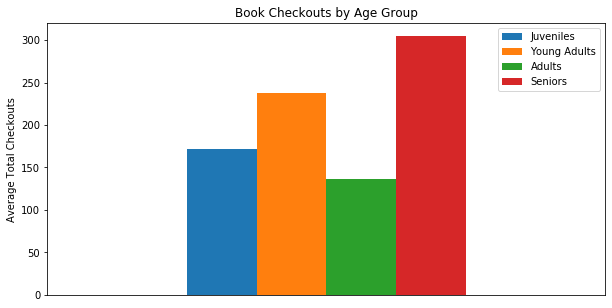

In [15]:
import matplotlib.pyplot as plt

df_avg.plot(kind = 'bar', figsize = (10,5))
plt.title('Book Checkouts by Age Group')
plt.ylabel('Average Total Checkouts')
plt.tick_params(
   axis='x',          # changes apply to the x-axis
   which='both',      # both major and minor ticks are affected
   bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [16]:
df_special = df_lib[df_lib['Patron Type Definition'] == 'SPECIAL']
df_1= df_lib.drop(df_special.index, axis=0)
#df_1
df_welcome = df_lib[df_lib['Patron Type Definition'] == 'AT USER SENIOR']
df_2=df_1.drop(df_welcome.index, axis=0)
#df_2
df_tc = df_lib[df_lib['Patron Type Definition'] == 'TEACHER CARD']
df_3=df_2.drop(df_tc.index, axis=0)
#df_3
df_vis = df_lib[df_lib['Patron Type Definition'] == 'VISITOR']
df_4=df_3.drop(df_vis.index, axis=0)
#df_4
df_7c = df_lib[df_lib['Patron Type Definition'] == 'DIGITAL ACCESS CARD']
df_5=df_4.drop(df_7c.index, axis=0)
#df_5
df_ata = df_lib[df_lib['Patron Type Definition'] == 'AT USER ADULT']
df_6=df_5.drop(df_ata.index, axis=0)
#df_6
df_att = df_lib[df_lib['Patron Type Definition'] == 'AT USER TEEN']
df_7=df_6.drop(df_att.index, axis=0)
#df_7
df_aw = df_lib[df_lib['Patron Type Definition'] == 'AT USER WELCOME']
df_8=df_7.drop(df_aw.index, axis=0)
#df_8
df_ffl = df_lib[df_lib['Patron Type Definition'] == 'FRIENDS FOR LIFE']
df_9=df_8.drop(df_ffl.index, axis=0)
#df_9
df_bbm = df_lib[df_lib['Patron Type Definition'] == 'BOOKS BY MAIL']
df_10=df_9.drop(df_bbm.index, axis=0)
#df_10
df_atj = df_lib[df_lib['Patron Type Definition'] == 'AT USER JUVENILE']
df_11=df_10.drop(df_atj.index, axis=0)
#df_11
df_staff = df_lib[df_lib['Patron Type Definition'] == 'STAFF']
df_12=df_11.drop(df_staff.index, axis=0)
#df_12
df_ret = df_lib[df_lib['Patron Type Definition'] == 'RETIRED STAFF']
df_13=df_12.drop(df_ret.index, axis=0)
df_13.head()

,Patron Type Definition,Total Checkouts,Home Library Definition
294771,ADULT,35907,Visitacion Valley
163107,SENIOR,25223,Main Library
147572,ADULT,24093,Main Library
199745,SENIOR,18397,Main Library
156043,ADULT,17308,Main Library


In [17]:
df_wel = df_lib[df_lib['Patron Type Definition'] == 'WELCOME']
df_final=df_13.drop(df_wel.index, axis=0)
df_final.head()

,Patron Type Definition,Total Checkouts,Home Library Definition
294771,ADULT,35907,Visitacion Valley
163107,SENIOR,25223,Main Library
147572,ADULT,24093,Main Library
199745,SENIOR,18397,Main Library
156043,ADULT,17308,Main Library


In [18]:
df_final['Patron Type Definition'].unique()


array(['ADULT', 'SENIOR', 'YOUNG ADULT', 'JUVENILE'], dtype=object)

In [19]:
df_final['Home Library Definition'].unique()

array(['Visitacion Valley', 'Main Library', 'Chinatown',
       'Eureka Valley/Harvey Milk Memorial', 'Merced', 'Ortega',
       'Richmond', 'Sunset', 'Mission', 'Park', 'West Portal',
       'North Beach', 'Parkside', 'Glen Park', 'Marina',
       'Bayview/Linda Brooks-Burton', 'Mission Bay', 'Excelsior',
       'Ingleside', 'Portola', 'Noe Valley/Sally Brunn', 'Anza',
       'Presidio', 'Unknown', 'Golden Gate Valley', 'Bernal Heights',
       'Ocean View', 'Western Addition', 'Potrero', 'Library on Wheels',
       "Children's Bookmobile", 'Branch Bookmobile (West Portal)',
       'Branch Bookmobile (Excelsior)', 'Branch Bookmobile (Sunset)',
       'Branch Bookmobile (Marina)'], dtype=object)

In [20]:
df_dummy = pd.get_dummies(df_final['Patron Type Definition'])
df_dummy.head()

,ADULT,JUVENILE,SENIOR,YOUNG ADULT
294771,1,0,0,0
163107,0,0,1,0
147572,1,0,0,0
199745,0,0,1,0
156043,1,0,0,0


In [24]:
X = np.asarray(df_dummy[['ADULT', 'JUVENILE','SENIOR','YOUNG ADULT']])
y = np.asarray(df_final['Total Checkouts'])
print(X, y)

[[1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]] [35907 25223 24093 ...     0     0     0]


In [25]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=4, shuffle=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,logreg.predict(X_test)))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
